## Actividad de Ejercitación

**Problema:**

Supongamos que la función de ingreso marginal de una empresa está dada por:

$$ IMg(q) = 50 - 0.5 \cdot q $$

donde $q$ es la cantidad producida.

Además, sabemos que el costo marginal de la empresa es:

$$ CMg(q) = 10 + 0.3 \cdot q $$

y que el costo fijo es de $100.

**Resolver los siguientes puntos:**

1.  **Recuperar la función de ingreso total (I(q))**: Utiliza la integral indefinida para obtener la función de ingreso total a partir del ingreso marginal. Recuerda que el ingreso total es cero cuando la cantidad producida es cero ($I(0) = 0$).
2.  **Recuperar la función de costo total (C(q))**: Utiliza la integral indefinida para obtener la función de costo total a partir del costo marginal. Utiliza la información del costo fijo para determinar la constante de integración.
3.  **Calcular la función de beneficio total (B(q))**: Resta la función de costo total de la función de ingreso total para obtener la función de beneficio total.
4.  **Encontrar la cantidad óptima (q*)**: Determina la cantidad de producción que maximiza el beneficio igualando el ingreso marginal al costo marginal ($IMg(q) = CMg(q)$) y resolviendo para $q$.
5.  **Calcular el beneficio máximo (B(q*))**: Sustituye la cantidad óptima ($q^{*}$) en la función de beneficio total para encontrar el beneficio máximo.
6.  **Visualizar las funciones**: Grafica las funciones de ingreso total, costo total y beneficio total en el mismo gráfico para visualizar el punto de beneficio máximo.

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
#defino q y C como variables, siendo C la constante del resultado que integramos
q, C = sp.symbols('q C')

In [ ]:
i_mg = 50 - 0.5*q #funcion ingreso marginal
c_mg = 10 + 0.3*q #funcion costo marginal

In [ ]:
I_total = sp.integrate(i_mg, q)
C_total = sp.integrate(c_mg, q) + C
display(I_total)
display(C_total)

-0.25*q**2 + 50.0*q

C + 0.15*q**2 + 10.0*q

In [ ]:
#tenemos como dato costo fijo = 100, por lo tanto C = 100
C_totalf = C_total.subs(C, 100)
display(C_totalf)

0.15*q**2 + 10.0*q + 100

In [ ]:
beneficio  = I_total - C_totalf #funcion beneficio total
display(beneficio)

-0.4*q**2 + 40.0*q - 100

In [ ]:
q_opt = sp.solve(sp.Eq(i_mg, c_mg), q)[0]
q_opt

50.0000000000000

In [ ]:
beneficio = beneficio.subs(q, q_opt)
beneficio = beneficio.subs(C, 100)
beneficio

900.000000000000

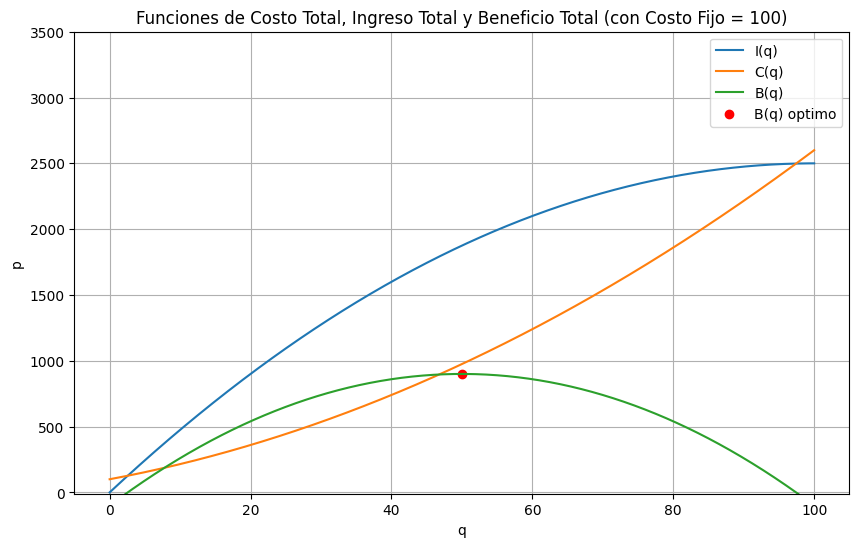

In [ ]:
q_grid = np.linspace(0, 100, 1000)

I_num = sp.lambdify(q, I_total)
C_num = sp.lambdify(q, C_totalf)
B_num = sp.lambdify(q, I_total - C_totalf)

I_val = I_num(q_grid)
C_val = C_num(q_grid)
B_val = B_num(q_grid)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(q_grid, I_val, label='I(q)')
ax.plot(q_grid, C_val, label='C(q)')
ax.plot(q_grid, B_val, label='B(q)')

ax.set_title("Funciones de Costo Total, Ingreso Total y Beneficio Total (con Costo Fijo = 100)")
ax.set_xlabel("q")
ax.set_ylabel("p")
plt.scatter(q_opt, beneficio, color='red', label='B(q) optimo')
ax.legend()
ax.grid(True)
plt.ylim(-10, 3500) # Ajusta los límites del eje y si es necesario
plt.show()